# spanish texts

## text corpus

In [1]:
import pandas as pd 

In [2]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [3]:
corpus = list(corpus['texts'])

In [4]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [5]:
def tokenize(s):
    return s.split(' ')

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.6 MB 44.2 MB/s eta 0:00:01
     |████████████████████████████████| 819 kB 75.8 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.6.0.post20210108
    Uninstalling setuptools-49.6.0.post20210108:
      Successfully uninstalled setuptools-49.6.0.post20210108
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2


In [8]:
pip install -U spacy

     |████████████████████████████████| 6.4 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 71.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 10.2 MB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 622 kB 48.5 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 72.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 53.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 7.4 kB/s  eta 0:00:01     |█████████████████████████▋      | 328.4 MB 78.4 MB/s eta 0:00:02
     |████████████████████████████████| 998 kB 28.2 MB/s eta 0:00:01
     |████████████████████████████████| 831.4 MB 3.3 kB/s  eta 0:00:01    |█▋                              | 42.9 MB 62.8 MB/s eta 0:00:13     |█████                           | 132.3 MB 65.1 MB/s eta 0:00:11     |█████▉                          | 151.9 MB 68.5 MB/s eta 0:00:10     |█████████▌                      | 246.9 MB 69.4 MB/s eta 0:00:09/s eta 0:00:06     |█████████████████████████▎      | 657.5 MB 69.6 MB/s eta 0:00:03
     |████████████████████████████████| 2.2 MB 50.7 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 47.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [10]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [11]:
from nltk.corpus import stopwords

def clean(sentence):
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if token.pos_=='NOUN']
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in stopwords.words('spanish')]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[w for w in sentence if not w.isdigit()]
    return sentence

In [12]:
clean('El curso está,, en general; bien constituido ')

['curso', 'general']

## basic statistics: types and tokens

In [13]:
#clean_corpus_all = [clean(sentence) for sentence in corpus]
#index_sentences = dict(zip(range(len(clean_corpus_all),clean_corpus_all)))
clean_corpus = []
CORPUS = []
for i in range(len(corpus)):
    C = clean(corpus[i])
    if len(C)>1:
        clean_corpus+=[C]
        CORPUS+=[corpus[i]]

In [14]:
clean_corpus[:5]

[['curso', 'general'],
 ['orden', 'contenido'],
 ['acuerdo', 'contenido', 'clase', 'bibliografía'],
 ['dinamica', 'dia', 'prueba', 'práctica'],
 ['mesa', 'practico', 'fin']]

In [15]:
from collections import Counter

In [16]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

858 291


## graphs!

In [17]:
import networkx as nx

In [18]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [19]:
graph_text = GoW()

In [20]:
graph_text.nodes()

NodeView(('curso', 'general', 'orden', 'contenido', 'acuerdo', 'clase', 'bibliografía', 'dinamica', 'dia', 'prueba', 'práctica', 'mesa', 'practico', 'fin', 'numero', 'alumno', 'aprendizaje', 'ayudantía', 'vez', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capítulo', 'información', 'fuente', 'profesor', 'cuanto', 'limit', 'ayuda', 'practica', 'teorica', 'pelvi', 'día', 'bloque', 'atención', 'hilo', 'caso', 'instancia', 'forma', 'ayudantia', 'horario', 'yincana', 'imagenología', 'imagenologia', 'sala', 'semestre', 'distribución', 'torax', 'cuello', 'continuacion', 'relación', 'inervación', 'irrigación', 'desempeño', 'estudiante', 'disposición', 'ambiente', 'alumnado', 'guía', 'autorregulación', 'actividad', 'posibilidad', 'nota', 'control', 'revisión', 'ayudante', 'presencia', 'opción', 'video', 'operación', 'disección', 'cadaver', 'organizacion', 'patología', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'cámara', 'práctico', 'puesto', 'trabajo', 'dibujo', 'm

In [21]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=3,font_color='k')
    plt.axis('off')
    plt.show()

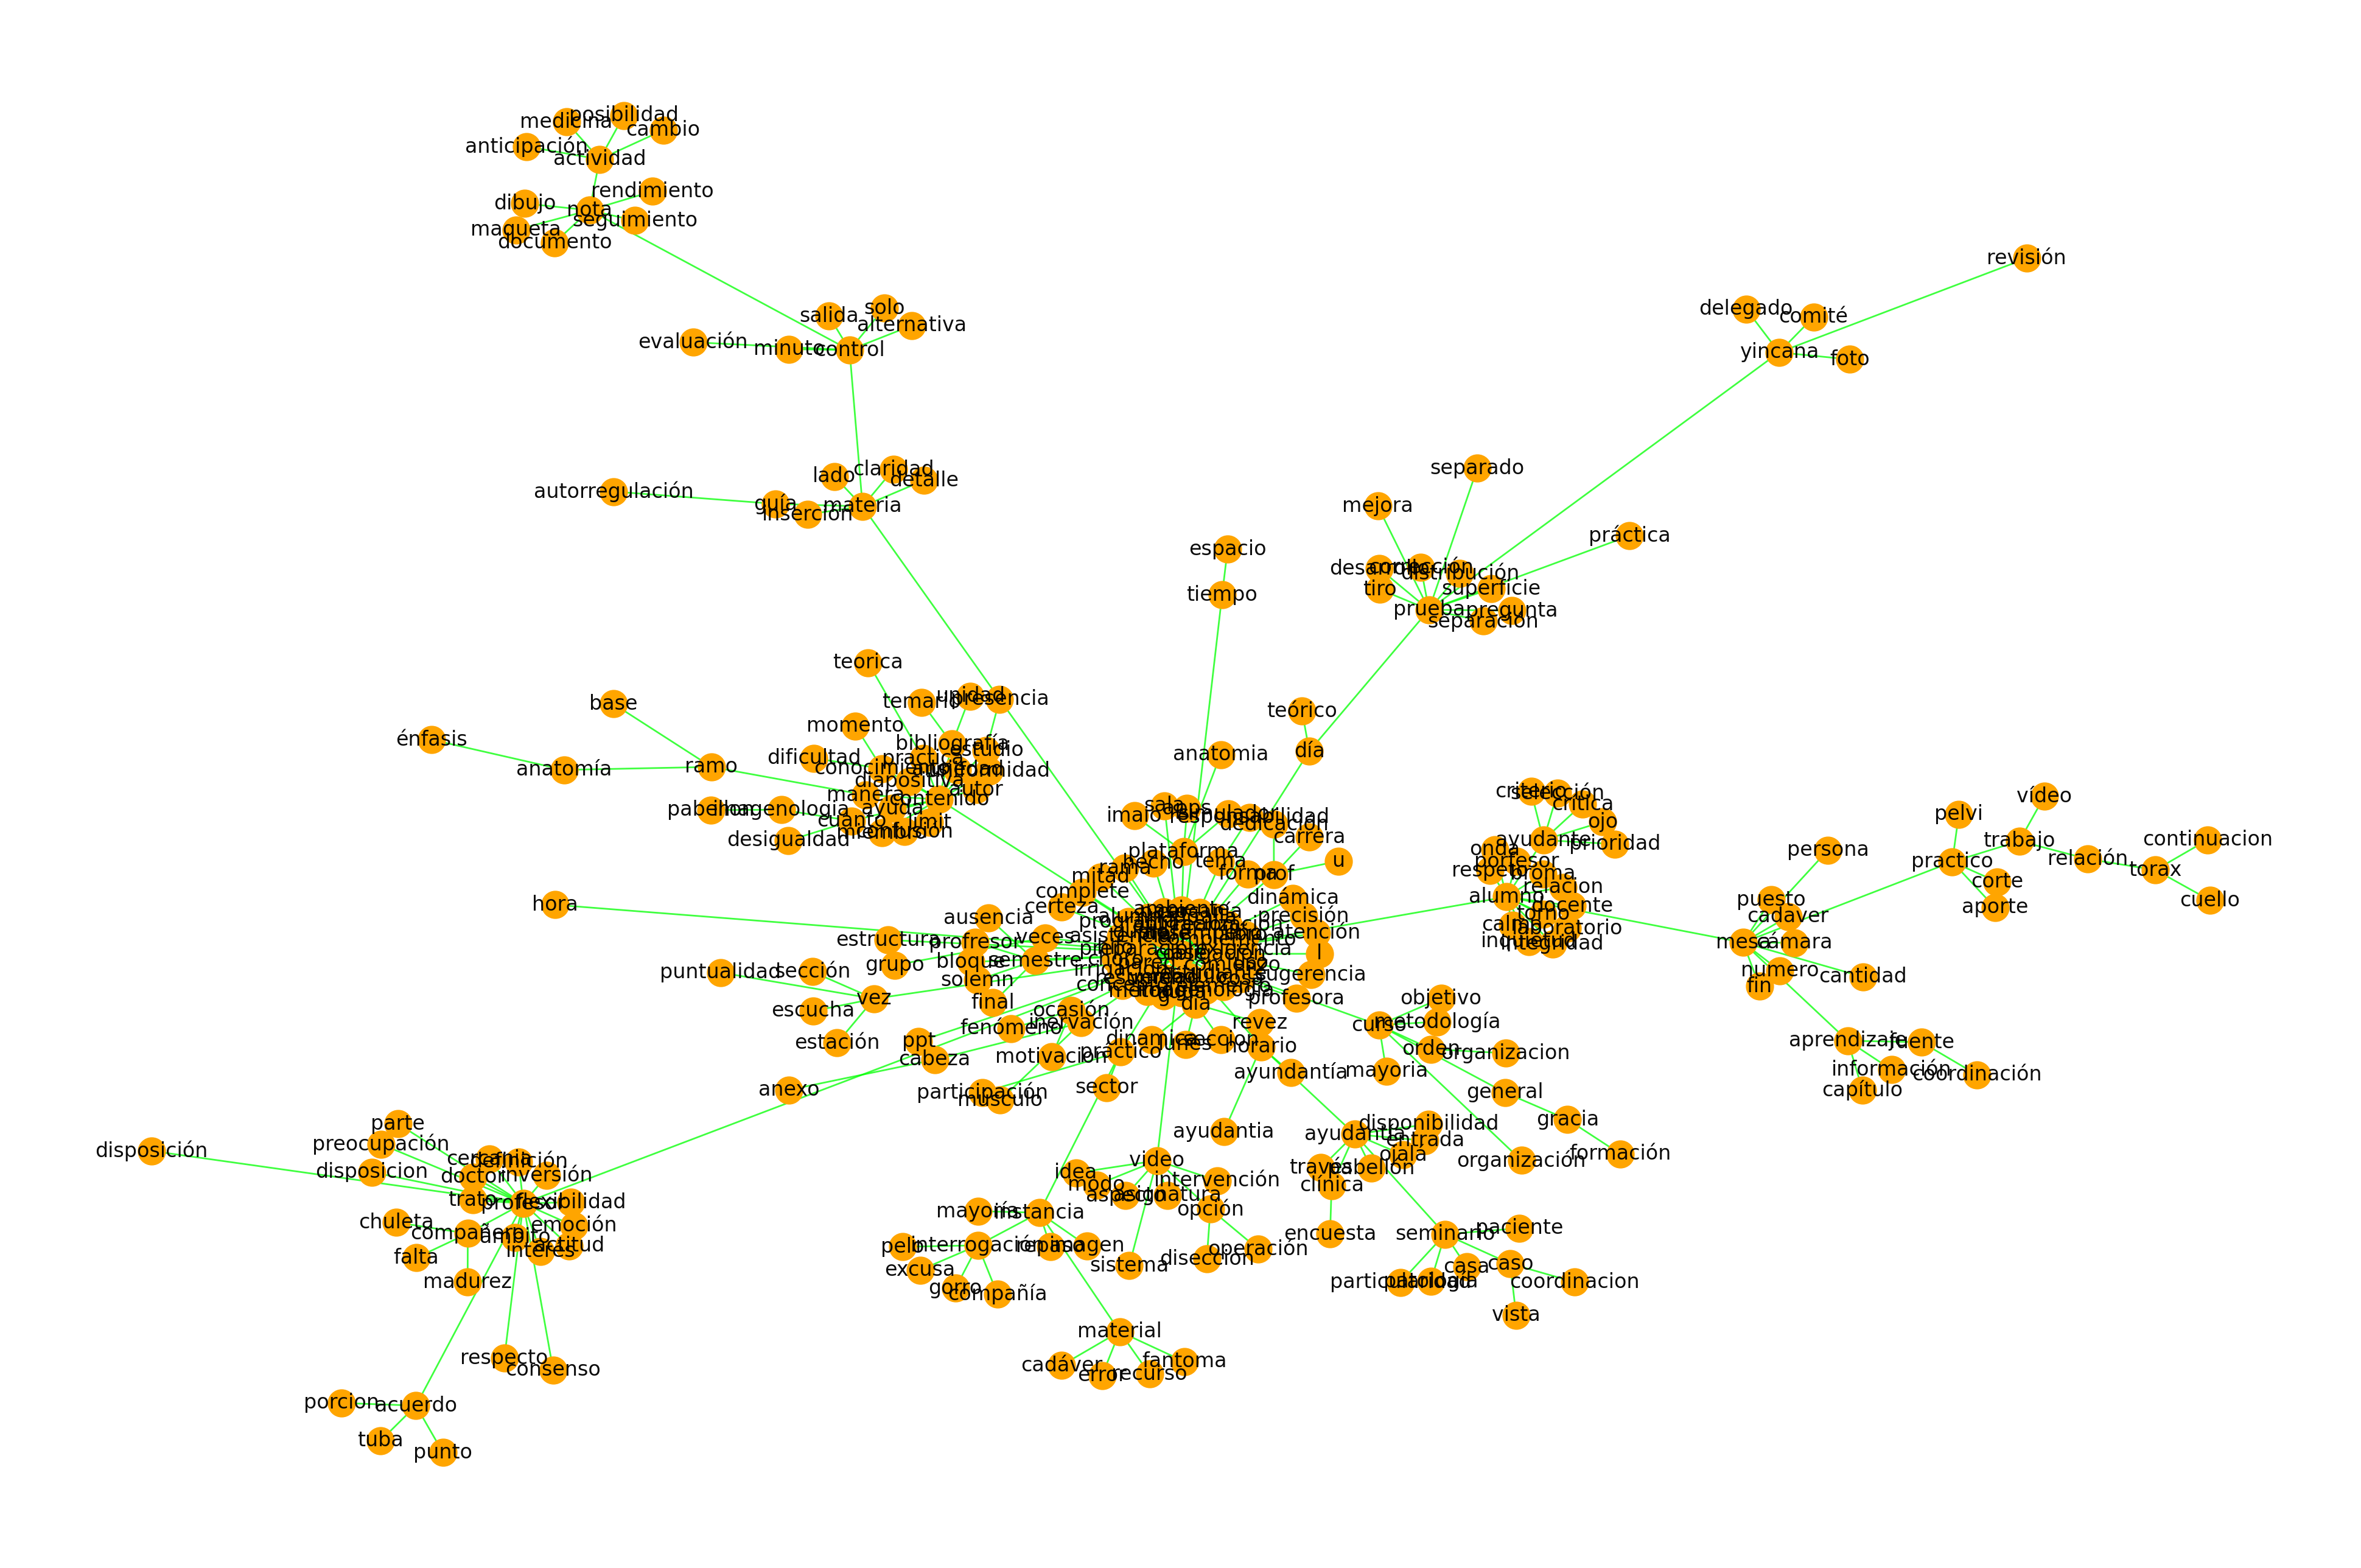

In [22]:
plot_graph(nx.maximum_spanning_tree(graph_text))

### main core

In [23]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
main_core = nx.k_core(graph_text)

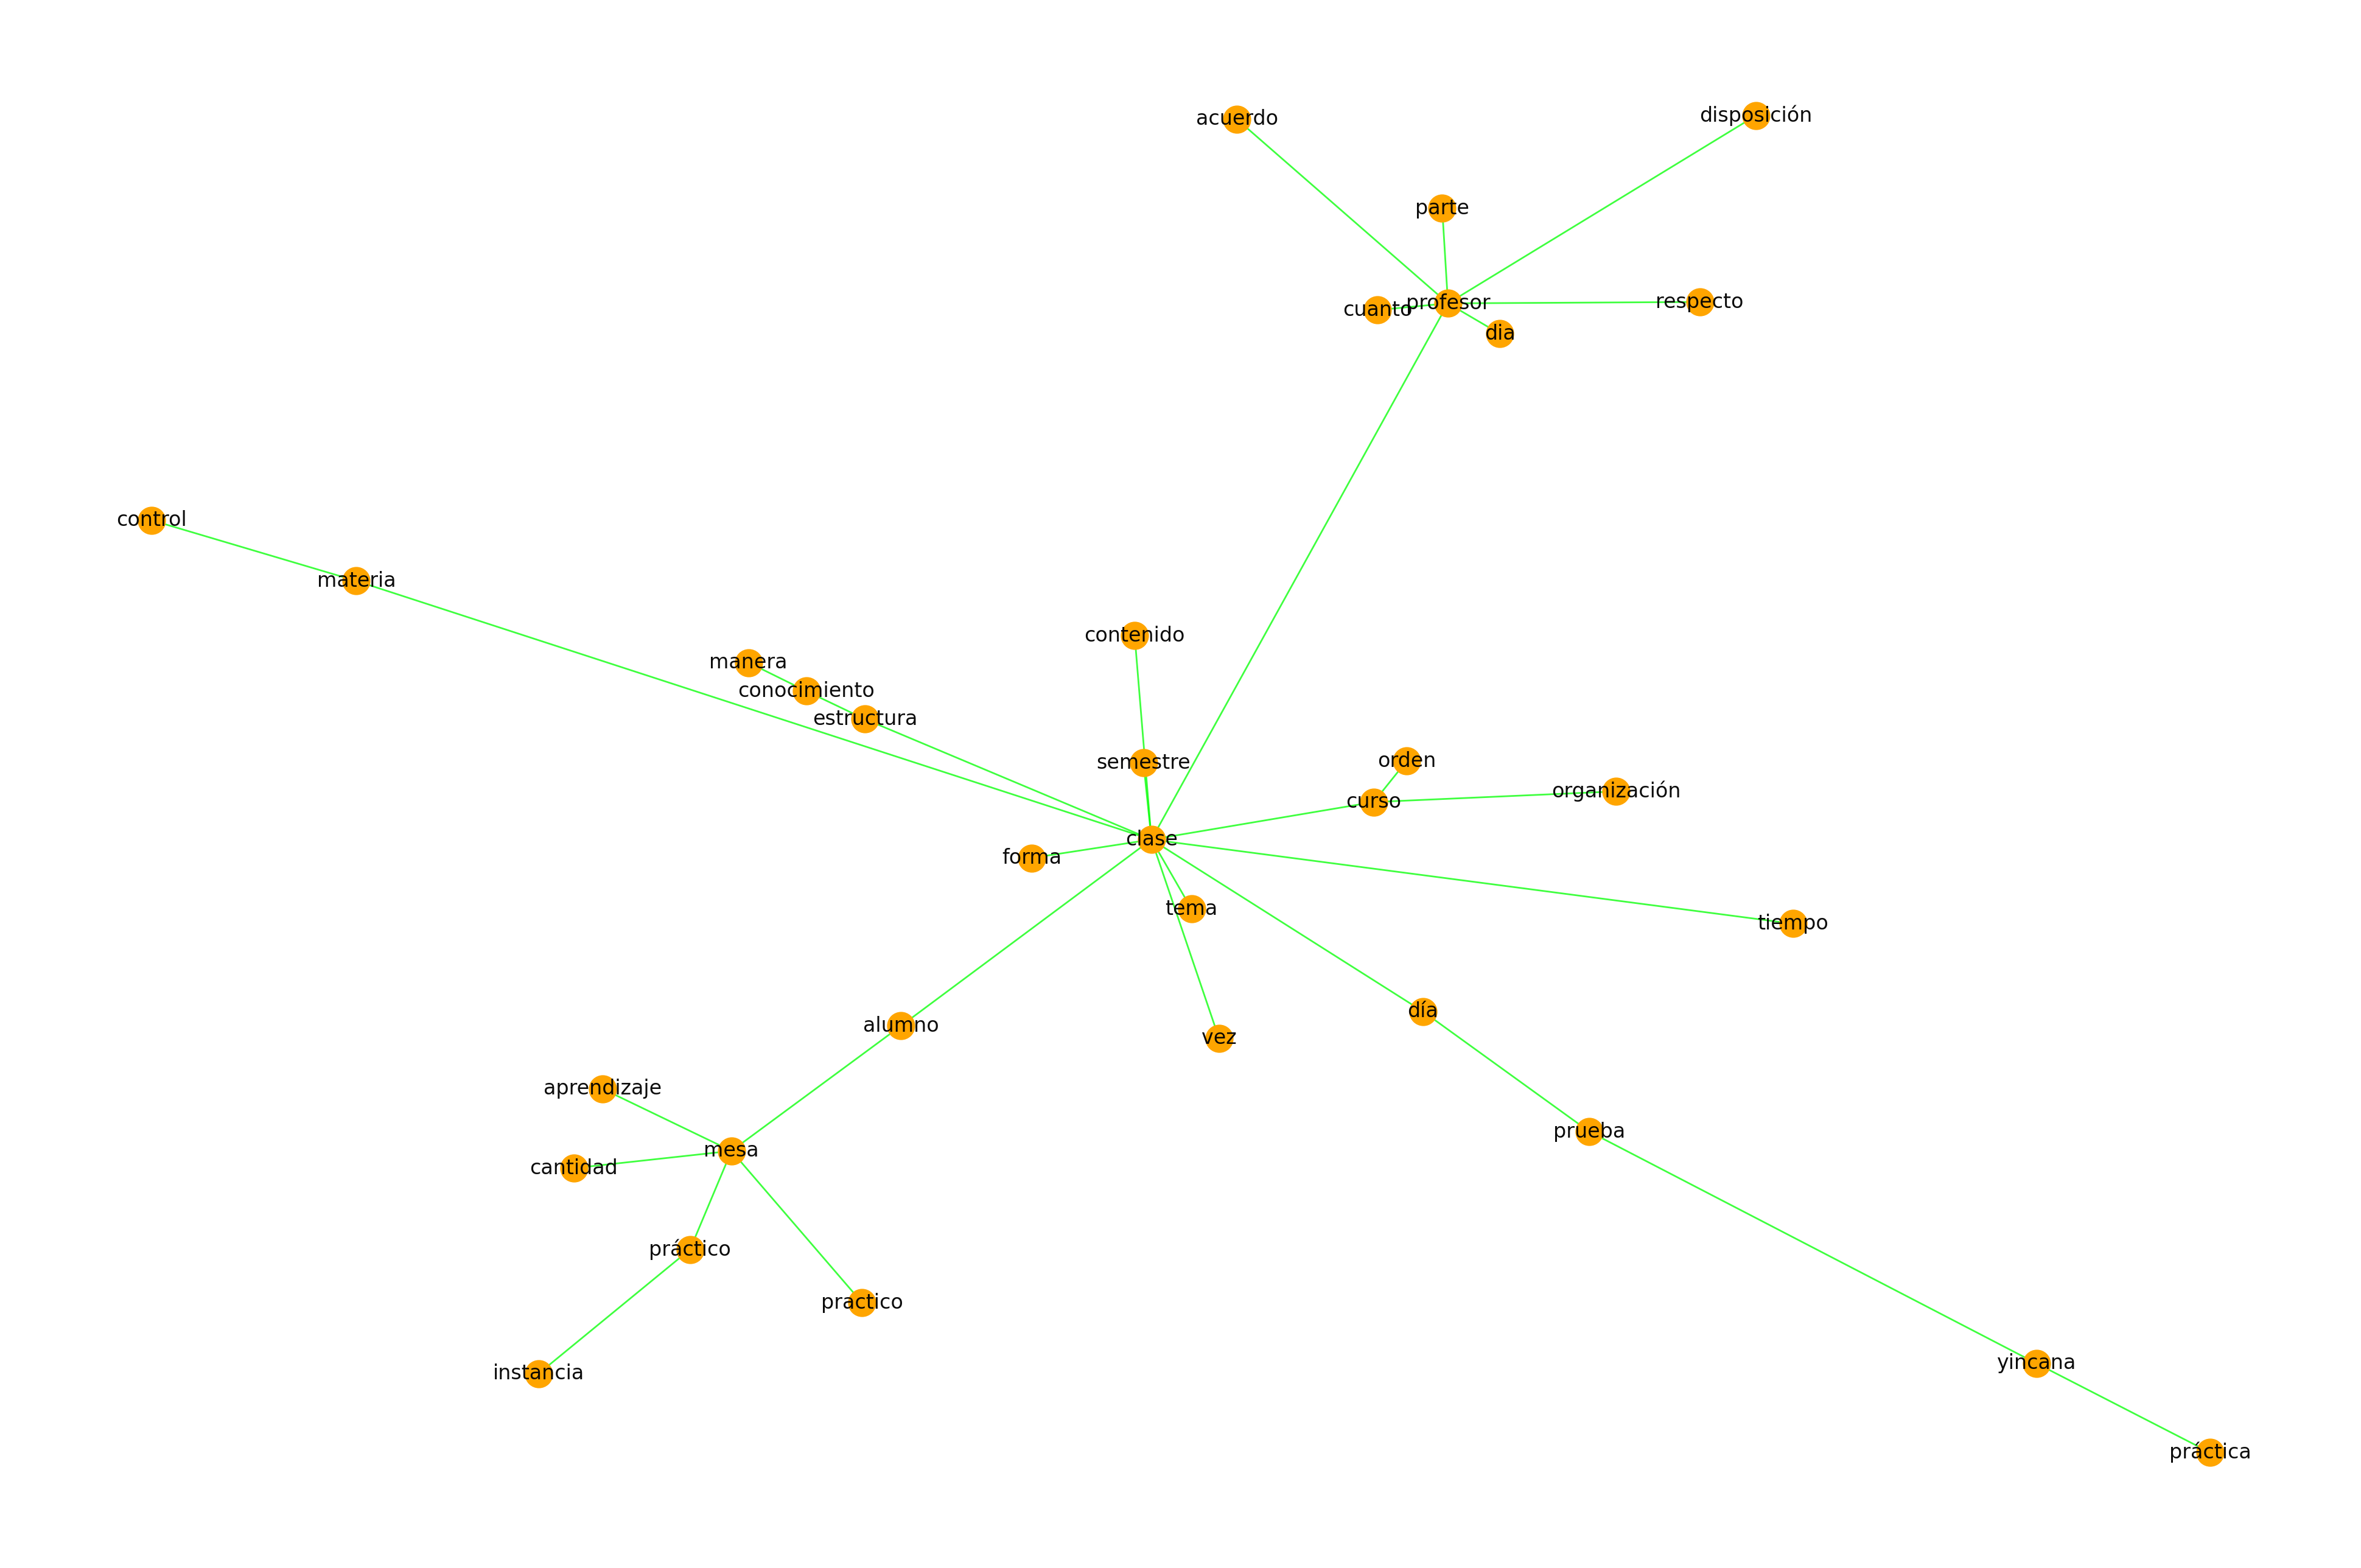

In [24]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [25]:
!pip install python-louvain

     |████████████████████████████████| 204 kB 29.8 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9414 sha256=a86c6ac3b68cf6921acbce452c32ebcb9f62d7108d45bac3fc58ed96f9bb228e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/9b/69/7c/a710d79e0174abd8b0e154d1360604eb125a86b5053f68cacd
Successfully built python-louvain


In [26]:
import community as community_louvain

In [27]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [28]:
len(set(partition.values()))

4

In [29]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [30]:
partition = dict(v)

In [31]:
partition

{3: ['acuerdo',
  'clase',
  'conocimiento',
  'contenido',
  'cuanto',
  'curso',
  'estructura',
  'forma',
  'manera',
  'materia',
  'organización',
  'tiempo'],
 2: ['alumno', 'aprendizaje', 'cantidad', 'mesa', 'practico', 'vez'],
 0: ['control',
  'dia',
  'día',
  'instancia',
  'orden',
  'prueba',
  'práctica',
  'práctico',
  'yincana'],
 1: ['disposición', 'parte', 'profesor', 'respecto', 'semestre', 'tema']}

In [32]:
#pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in partition.items() ]))

## clustering!

In [33]:
cluster_sentences = {group:[] for group in partition.keys()}

In [34]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [35]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity(sentence,partition[group])
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[CORPUS[clean_corpus.index(sentence)]]

In [36]:
cluster_sentences

{3: ['El curso está en general bien constituido ',
  'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
  'sigan con los seminarios hechos desde la casa',
  'que se aconseje un libro para el estudio de una determinada materia',
  'Debería haber un acuerdo previo entre los profesores en cuanto a contenidos, limites, etc. ',
  'Debería haber un acuerdo previo cuando se trate de una materia que se considera importante si o no se evaluará. ',
  'ayuda mas si es la teórica primero ya que se aprenden contenidos de la practica en el estudio de la teorica.',
  'hacer un bloque todos los días ayudaría a poner más atención en cada clase y no perder el hilo conductor de la materia.',
  'Ayudantia en horarios más comodos',
  'Creo que seria mejor tener siempre la solemne teorica antes que la practica.',
  'Creo que se podria mejorar y progundizar mas las clases de imagenología',
  'no siento que haya aprendido lo debido en cuanto a imagenologia.',
  

## another version of graphs!

In [37]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW_parts(text_clean,n_parts,radius=4):
    list_graphs=[]
    L = range(len(text_clean))
    parts = np.array_split(L, n_parts)
    
    for part in parts:
        G=nx.Graph()
        for sentence in [text_clean[i] for i in part]:
            if len(sentence)>1:
                pairs=[]
                for r in list(range(1,radius+1)):
                    pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
                for pair in pairs:
                    if G.has_edge(pair[0],pair[1])==False:
                        G.add_edge(pair[0],pair[1],weight=1)
                    else:
                        x=G[pair[0]][pair[1]]['weight']
                        G[pair[0]][pair[1]]['weight']=x+1
                    
        #Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        #G0 = G.subgraph(Gcc[0])
        list_graphs+=[G]
    
    return list_graphs

In [38]:
import random

repetitions = 10
graph_parts = [{} for r in range(repetitions)]

for i in range(repetitions):
    T = random.sample(clean_corpus,len(clean_corpus))
    for n_parts in [1,2,3,4,5,6,7,8,9,10]:
        G=GoW_parts(T,n_parts)
        graph_parts[i][n_parts]=G#nx.maximum_spanning_tree(G)

In [39]:
core_dict = {r:{} for r in range(repetitions)}

In [40]:
for r in range(repetitions):
    for n_part in graph_parts[i].keys():
        list_graphs=graph_parts[i][n_part]
        list_core = {}
        for i in range(len(list_graphs)):
            G=list_graphs[i]
            G.remove_edges_from(nx.selfloop_edges(G))
            list_core[i+1]=np.sum(list(nx.core_number(G).values()))
        core_dict[r][n_part]=list_core

In [41]:
core_dict

{0: {1: {1: 998},
  2: {1: 579, 2: 546},
  3: {1: 372, 2: 412, 3: 447},
  4: {1: 327, 2: 316, 3: 337, 4: 328},
  5: {1: 238, 2: 268, 3: 329, 4: 258, 5: 277},
  6: {1: 268, 2: 229, 3: 244, 4: 242, 5: 220, 6: 231},
  7: {1: 266, 2: 146, 3: 228, 4: 212, 5: 205, 6: 226, 7: 187},
  8: {1: 225, 2: 215, 3: 194, 4: 162, 5: 198, 6: 181, 7: 184, 8: 109},
  9: {1: 219, 2: 151, 3: 196, 4: 171, 5: 133, 6: 148, 7: 220, 8: 106, 9: 186},
  10: {1: 147,
   2: 164,
   3: 163,
   4: 130,
   5: 156,
   6: 174,
   7: 169,
   8: 168,
   9: 134,
   10: 167}},
 1: {1: {1: 998},
  2: {1: 579, 2: 546},
  3: {1: 372, 2: 412, 3: 447},
  4: {1: 327, 2: 316, 3: 337, 4: 328},
  5: {1: 238, 2: 268, 3: 329, 4: 258, 5: 277},
  6: {1: 268, 2: 229, 3: 244, 4: 242, 5: 220, 6: 231},
  7: {1: 266, 2: 146, 3: 228, 4: 212, 5: 205, 6: 226, 7: 187},
  8: {1: 225, 2: 215, 3: 194, 4: 162, 5: 198, 6: 181, 7: 184, 8: 109},
  9: {1: 219, 2: 151, 3: 196, 4: 171, 5: 133, 6: 148, 7: 220, 8: 106, 9: 186},
  10: {1: 147,
   2: 164,
   3: